In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('data/measurements.csv')

In [4]:
data.head() #no me lo quedo porque está separado por , y el excel por .

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [6]:
data2=pd.read_excel('data/measurements2.xlsx')

In [7]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [10]:
data.shape, data2.shape

((388, 12), (388, 12))

In [11]:
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [19]:
data2.specials.value_counts() #no aporta nada porque ya está especificado en otras columnas
data2.drop(['refill liters','refill gas','specials'], axis=1, inplace=True )

In [35]:
data2

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

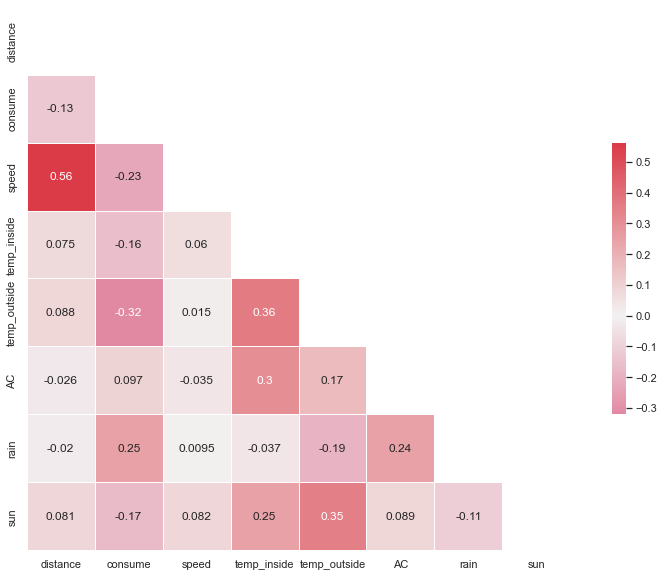

In [36]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

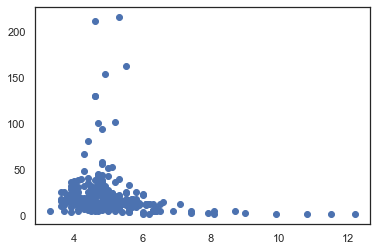

In [29]:
plt.scatter(x=data2.consume, y=data2.distance)


# añadir precio de combustible

E10 aprox=1.38EUR/L
SP98 aprox=1.46 EUR/L

habrá que ver con cual se ahorra más dinerillo

Separar en dos tablas


In [37]:
datae10= data2[data2.gas_type=='E10']

In [38]:
datasp98= data2[data2.gas_type=='SP98']

In [60]:
datae10.consume.isna().sum()

0

In [39]:
#calcular el consumo medio en función de la distancia y la velocidad

In [ ]:
distancia en km
velocidad en km/h
consumo en litros
precio en euros/l


consumo*precio dará los euros gastados

Creo que refill litres y gas no vale

In [81]:
#calcularemos el consumo/precio y ver el valor 

valor=[]

for i in range(len(datae10.consume)):
    try:
        valor.append(datae10.consume[i]/1.38)
    except:
        pass

In [82]:
valor  #euros que se han gstado

[3.6231884057971016,
 3.0434782608695654,
 3.985507246376812,
 2.8260869565217392,
 3.2608695652173916,
 4.637681159420291,
 3.1884057971014497,
 3.6231884057971016,
 4.637681159420291,
 3.8405797101449277,
 4.057971014492754,
 3.3333333333333335,
 4.27536231884058,
 3.6956521739130435,
 3.405797101449276,
 3.6956521739130435,
 4.057971014492754,
 3.6956521739130435,
 3.55072463768116,
 3.405797101449276,
 3.985507246376812,
 4.27536231884058,
 4.130434782608696,
 3.405797101449276,
 4.27536231884058,
 2.971014492753623,
 4.130434782608696,
 4.202898550724638,
 3.985507246376812,
 4.130434782608696,
 3.8405797101449277,
 3.6231884057971016,
 4.057971014492754,
 3.4782608695652177,
 3.1159420289855073,
 4.130434782608696,
 3.768115942028986,
 5.362318840579711,
 3.4782608695652177,
 4.710144927536232,
 2.8985507246376816,
 3.6231884057971016,
 3.3333333333333335,
 3.1159420289855073,
 3.91304347826087,
 3.1159420289855073,
 3.91304347826087,
 3.1159420289855073,
 3.768115942028986,
 2.9

In [83]:
#calcularemos el consumo/precio y ver el valor 

valorsp98=[]

for i in range(len(datasp98.consume)):
    try:
        valorsp98.append(datasp98.consume[i]/1.46)
    except:
        pass

In [84]:
valorsp98

[2.26027397260274,
 6.780821917808219,
 3.4931506849315066,
 3.3561643835616444,
 3.3561643835616444,
 3.219178082191781,
 3.4931506849315066,
 3.3561643835616444,
 2.8767123287671237,
 4.178082191780822,
 4.383561643835617,
 3.3561643835616444,
 3.3561643835616444,
 4.2465753424657535,
 2.8767123287671237,
 3.904109589041096,
 5.41095890410959,
 8.356164383561644,
 3.9726027397260273,
 3.6301369863013697,
 3.6986301369863015,
 3.219178082191781,
 3.150684931506849,
 3.6986301369863015,
 2.9452054794520546,
 3.0821917808219177,
 3.5616438356164384,
 4.2465753424657535,
 3.4931506849315066,
 2.671232876712329,
 3.4246575342465753,
 3.6986301369863015,
 3.0821917808219177,
 3.4931506849315066,
 3.219178082191781,
 2.73972602739726,
 3.6986301369863015,
 3.0821917808219177,
 2.4657534246575343,
 3.5616438356164384,
 3.3561643835616444,
 4.2465753424657535,
 2.9452054794520546,
 3.4246575342465753,
 3.4931506849315066,
 3.835616438356164,
 2.9452054794520546,
 3.9726027397260273,
 2.739726

In [ ]:
#sp98

In [85]:
valormean2=sum(valorsp98)/len(valorsp98)
valormean2

3.5865504358655054

In [86]:
datasp98.distance.mean()

18.639912280701765

In [87]:
datasp98.consume.mean()

4.899122807017543

In [93]:
#solucion 

datasp98.distance.mean()/valormean2

5.197169986598442

In [88]:
#E10


In [89]:
datae10.distance.mean()

21.096250000000005

In [90]:
datae10.consume.mean()

4.931250000000001

In [91]:
datae10.speed.mean()

43.50625

In [92]:
valormean=sum(valor)/len(valor)
valormean

3.727982162764773

In [94]:
#solucion
datae10.distance.mean()/valormean

5.658892419258372

In [ ]:
#solución total= Consume más el E10 
